In [1]:
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import roc_curve, precision_recall_curve 

Using TensorFlow backend.


In [2]:
n1 = np.load('dph1_sig.npy')
bin1 = np.load('dph1_sig_bin.npy')
n2 = np.load('dph1_bkg.npy')
bin2 = np.load('dph1_bkg_bin.npy')


n3 = np.load('dz_sig.npy')
bin3 = np.load('dz_sig_bin.npy')
n4 = np.load('dz_bkg.npy')
bin4 = np.load('dz_bkg_bin.npy')

n5 = np.load('dr_sig.npy')
bin5 = np.load('dr_sig_bin.npy')
n6 = np.load('dr_bkg.npy')
bin6 = np.load('dr_bkg_bin.npy')


n7 = np.load('phislope_sig.npy')
bin7 = np.load('phislope_sig_bin.npy')
n8 = np.load('phislope_bkg.npy')
bin8 = np.load('phislope_bkg_bin.npy')


n9 = np.load('z0_sig.npy')
bin9 = np.load('z0_sig_bin.npy')
n10 = np.load('z0_bkg.npy')
bin10 = np.load('z0_bkg_bin.npy')


n11 = np.load('deta_sig.npy')
bin11 = np.load('deta_sig_bin.npy')

n12 = np.load('deta_bkg.npy')
bin12 = np.load('deta_bkg_bin.npy')

In [3]:
array1 = []
for i, j in zip(bin1[:-1], n1):
    while j>=1:
        array1.append(i)
        j = j-1
array1 = np.array(array1)

array2 = []
for i, j in zip(bin2[:-1], n2):
    while j>=1:
        array2.append(i)
        j = j-1
array2 = np.array(array2)

array3 = []
for i, j in zip(bin3[:-1], n3):
    while j>=1:
        array3.append(i)
        j = j-1
array3 = np.array(array3)

array4 = []
for i, j in zip(bin4[:-1], n4):
    while j>=1:
        array4.append(i)
        j = j-1
array4 = np.array(array4)

array5 = []
for i, j in zip(bin5[:-1], n5):
    while j>=1:
        array5.append(i)
        j = j-1
array5 = np.array(array5)

array6 = []
for i, j in zip(bin6[:-1], n6):
    while j>=1:
        array6.append(i)
        j = j-1
array6 = np.array(array6)

array7 = []
for i, j in zip(bin7[:-1], n7):
    while j>=1:
        array7.append(i)
        j = j-1
array7 = np.array(array7)

array8 = []
for i, j in zip(bin8[:-1], n8):
    while j>=1:
        array8.append(i)
        j = j-1
array8 = np.array(array8)

array9 = []
for i, j in zip(bin9[:-1], n9):
    while j>=1:
        array9.append(i)
        j = j-1
array9 = np.array(array9)

array10 = []
for i, j in zip(bin10[:-1], n10):
    while j>=1:
        array10.append(i)
        j = j-1
array10 = np.array(array10)

array11 = []
for i, j in zip(bin11[:-1], n11):
    while j>=1:
        array11.append(i)
        j = j-1
array11 = np.array(array11)

array12 = []
for i, j in zip(bin12[:-1], n12):
    while j>=1:
        array12.append(i)
        j = j-1
array12 = np.array(array12)

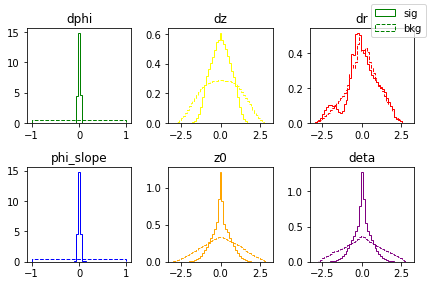

In [4]:
fig, axs = plt.subplots(2, 3)
axs[0, 0].hist(array1, histtype='step', color = 'green', label='signal_dphi', density = True, bins = bin1)
axs[0, 0].hist(array2, histtype='step', color='green', linestyle='dashed', label='bkg_dphi', density = True, bins = bin2)
axs[0, 0].set_title('dphi')

axs[0, 1].hist(array3, histtype='step', color = 'yellow', label='signal_dz', density = True, bins = bin3)
axs[0, 1].hist(array4, histtype='step', color='yellow', linestyle='dashed', label='bkg_dz', density = True, bins = bin4)
axs[0, 1].set_title('dz')

axs[0, 2].hist(array5, histtype='step', color = 'red', label='signal_dr', density = True, bins = bin5)
axs[0, 2].hist(array6, histtype='step', color='red', linestyle='dashed', label='bkg_dr', density = True, bins = bin6)
axs[0, 2].set_title('dr')

axs[1, 0].hist(array7, histtype='step', color = 'blue', label='signal_phislope', density = True, bins = bin7)
axs[1, 0].hist(array8, histtype='step', color='blue', linestyle='dashed', label='bkg_phislope', density = True, bins = bin8)
axs[1, 0].set_title('phi_slope')

axs[1, 1].hist(array9, histtype='step', color = 'orange', label='signal_z0', density = True, bins = bin9)
axs[1, 1].hist(array10, histtype='step', color='orange', linestyle='dashed', label='bkg_z0', density = True, bins = bin10)
axs[1, 1].set_title('z0')

axs[1, 2].hist(array11, histtype='step', color = 'purple', label='signal_deta', density = True, bins = bin11)
axs[1, 2].hist(array12, histtype='step', color='purple', linestyle='dashed', label='bkg_deta', density = True, bins = bin12)
axs[1, 2].set_title('deta')
plt.tight_layout()

fig.legend(['sig', 'bkg'])
fig.savefig('spatial parameters distribution.pdf', bbox_inches='tight')

In [5]:
num_triplets = np.load('numbers_of_spatial_triplets_testing.npy')
num_triplets_c = np.load('numbers_of_cluster_triplets_testing.npy')
num_triplets_t = np.load('numbers_of_combined_triplets_testing.npy')

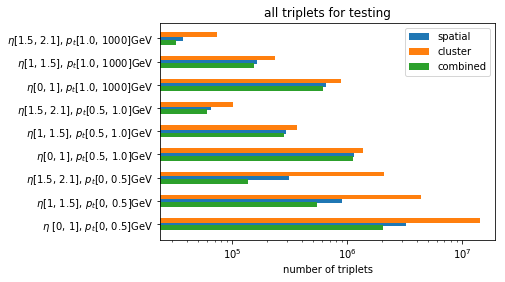

In [6]:
fig, ax = plt.subplots()
data_range = ('$\eta$ [0, 1], $p_t$[0, 0.5]GeV', '$\eta$[1, 1.5], $p_t$[0, 0.5]GeV', '$\eta$[1.5, 2.1], $p_t$[0, 0.5]GeV',
              '$\eta$[0, 1], $p_t$[0.5, 1.0]GeV', '$\eta$[1, 1.5], $p_t$[0.5, 1.0]GeV', '$\eta$[1.5, 2.1], $p_t$[0.5, 1.0]GeV', 
              '$\eta$[0, 1], $p_t$[1.0, 1000]GeV', '$\eta$[1, 1.5], $p_t$[1.0, 1000]GeV', '$\eta$[1.5, 2.1], $p_t$[1.0, 1000]GeV')
y_pos = np.arange(len(data_range))
height = 0.2


rects1 = ax.barh(y_pos, num_triplets, height, align='center')
rects2 = ax.barh(y_pos + 0.8*height, num_triplets_c, height, align='center')
rects3 = ax.barh(y_pos - 0.8*height, num_triplets_t, height, align='center')                 

ax.set_yticks(y_pos)
ax.set_yticklabels(data_range)

plt.legend(['spatial', 'cluster', 'combined'])
plt.xlabel('number of triplets')
plt.xscale('log')
plt.title('all triplets for testing')
plt.show()
fig.savefig('pt eta distribution.pdf', bbox_inches='tight')

In [7]:
bins = np.load('prediction_scores_bins.npy')

m1 = np.load('prediction_scores_spatial_sig_.npy')
m2 = np.load('prediction_scores_spatial_bkg_.npy')
m3 = np.load('prediction_scores_cluster_sig_.npy')
m4 = np.load('prediction_scores_cluster_bkg_.npy')
m5 = np.load('prediction_scores_combined_sig_.npy')
m6 = np.load('prediction_scores_combined_bkg_.npy')

In [8]:
predictions_spatial_sig = []
for i, j in zip(bins[:-1], m1):
    while j>=1:
        predictions_spatial_sig.append(i)
        j = j-1
predictions_spatial_sig = np.array(predictions_spatial_sig)

predictions_spatial_bkg = []
for i, j in zip(bins[:-1], m2):
    while j>=1:
        predictions_spatial_bkg.append(i)
        j = j-1
predictions_spatial_bkg = np.array(predictions_spatial_bkg)

predictions_cluster_sig = []
for i, j in zip(bins[:-1], m3):
    while j>=1:
        predictions_cluster_sig.append(i)
        j = j-1
predictions_cluster_sig = np.array(predictions_cluster_sig)

predictions_cluster_bkg = []
for i, j in zip(bins[:-1], m4):
    while j>=1:
        predictions_cluster_bkg.append(i)
        j = j-1
predictions_cluster_bkg = np.array(predictions_cluster_bkg)

predictions_combined_sig = []
for i, j in zip(bins[:-1], m5):
    while j>=1:
        predictions_combined_sig.append(i)
        j = j-1
predictions_combined_sig = np.array(predictions_combined_sig)

predictions_combined_bkg = []
for i, j in zip(bins[:-1], m6):
    while j>=1:
        predictions_combined_bkg.append(i)
        j = j-1
predictions_combined_bkg = np.array(predictions_combined_bkg)

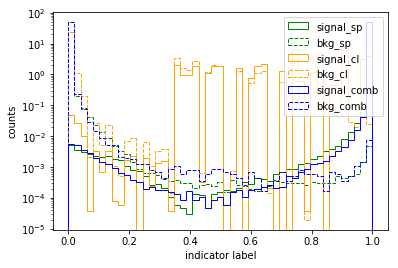

In [9]:
bb = np.linspace(0, 1, 50)
plt.hist(predictions_spatial_sig, histtype='step', color='green', label='signal_sp', density=True, bins = bb)
plt.hist(predictions_spatial_bkg, histtype='step', color='green', linestyle='dashed', label='bkg_sp', density =True, bins = bb)
plt.hist(predictions_cluster_sig, histtype='step', color='orange', label='signal_cl', density =True, bins = bb)
plt.hist(predictions_cluster_bkg, histtype='step', color='orange', linestyle='dashed', label='bkg_cl', density =True, bins = bb)
plt.hist(predictions_combined_sig, histtype='step', color='blue', label='signal_comb', density =True, bins = bb)
plt.hist(predictions_combined_bkg, histtype='step', color='blue', linestyle='dashed', label='bkg_comb', density =True, bins = bb)
plt.yscale('log')
plt.xlabel('indicator label')
plt.ylabel('counts')
plt.legend()
plt.savefig('prediction score distribution.pdf', bbox_inches='tight')

In [10]:
tpr_clasify, fpr_clasify = np.load('tpr_spatial.npy'), np.load('fpr_spatial.npy')
tpr_clasify_c, fpr_clasify_c = np.load('tpr_cluster.npy'), np.load('fpr_cluster.npy')
tpr_clasify_t, fpr_clasify_t = np.load('tpr_combined.npy'), np.load('fpr_combined.npy')

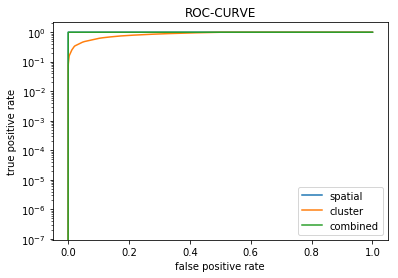

In [11]:
plt.plot(fpr_clasify, tpr_clasify)
plt.plot(fpr_clasify_c, tpr_clasify_c)
plt.plot(fpr_clasify_t, tpr_clasify_t)
plt.yscale('log')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(['spatial', 'cluster', 'combined'])
plt.title('ROC-CURVE')
plt.savefig('roc curve.pdf', bbox_inches='tight')

In [12]:
pur, eff = np.load('overall_purity_spatial.npy'), np.load('overall_efficiency_spatial.npy')
pur_c, eff_c = np.load('overall_purity_cluster.npy'), np.load('overall_efficiency_cluster.npy')
pur_t, eff_t = np.load('overall_purity_combined.npy'), np.load('overall_efficiency_combined.npy')

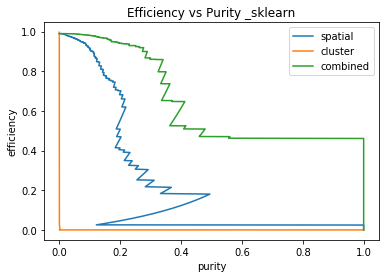

In [13]:
plt.plot(pur, eff)
plt.plot(pur_c, eff_c)
plt.plot(pur_t, eff_t)
plt.ylabel('efficiency')
plt.xlabel('purity')
plt.legend(['spatial', 'cluster', 'combined'])
plt.title('Efficiency vs Purity _sklearn')
plt.savefig('purity vs efficiency.pdf', bbox_inches='tight')

In [14]:
purities = np.load('purity_spatial.npy')
purities_c = np.load('purity_cluster.npy')
purities_t = np.load('purity_combined.npy')
purities_uncertainty_ = np.load('purity_spatial_uncertainty.npy')
purities_c_uncertainty_ = np.load('purity_cluster_uncertainty.npy')
purities_t_uncertainty_ = np.load('purity_combined_uncertainty.npy')

purities_uncertainty = np.array([i[1] - i[0] for i in purities_uncertainty_])
purities_c_uncertainty = np.array([i[1] - i[0] for i in purities_c_uncertainty_])
purities_t_uncertainty = np.array([i[1] - i[0] for i in purities_t_uncertainty_])

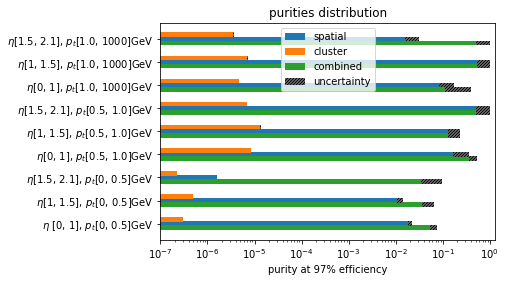

In [15]:
fig, ax = plt.subplots()
data_range = ('$\eta$ [0, 1], $p_t$[0, 0.5]GeV', '$\eta$[1, 1.5], $p_t$[0, 0.5]GeV', '$\eta$[1.5, 2.1], $p_t$[0, 0.5]GeV', 
              '$\eta$[0, 1], $p_t$[0.5, 1.0]GeV', '$\eta$[1, 1.5], $p_t$[0.5, 1.0]GeV', '$\eta$[1.5, 2.1], $p_t$[0.5, 1.0]GeV',
              '$\eta$[0, 1], $p_t$[1.0, 1000]GeV', '$\eta$[1, 1.5], $p_t$[1.0, 1000]GeV', '$\eta$[1.5, 2.1], $p_t$[1.0, 1000]GeV')
y_pos = np.arange(len(data_range))
height = 0.2

rects1 = ax.barh(y_pos, np.array(purities), height, align='center')
rects2 = ax.barh(y_pos + 0.9*height, np.array(purities_c), height, align='center')
rects3 = ax.barh(y_pos - 0.9*height, np.array(purities_t), height, align='center') 
rects1_ = ax.barh(y_pos, np.array(purities_uncertainty), height, align='center', left = np.array(purities_uncertainty_[:, 0]), color = 'C7', hatch = '////////')
rects2_ = ax.barh(y_pos + 0.9*height, np.array(purities_c_uncertainty), height, align='center', left = np.array(purities_c_uncertainty_[:, 0]), color = 'C7', hatch = '////////')
rects3_ = ax.barh(y_pos - 0.9*height, np.array(purities_t_uncertainty), height, align='center', left = np.array(purities_t_uncertainty_[:, 0]), color = 'C7', hatch = '////////')


ax.set_yticks(y_pos)
ax.set_yticklabels(data_range)

plt.xlabel('purity at 97% efficiency')
plt.legend(['spatial', 'cluster', 'combined', 'uncertainty'], loc = 'upper center')
plt.xscale('log')
plt.xlim([0.0000001, 1.3])

plt.title('purities distribution')

plt.show()
fig.savefig('purity distribution.pdf', bbox_inches='tight')